In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

# MitoCarta parsing

In [ ]:
MitoCarta3_file = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/MITOCARTA3.0/Mouse.MitoCarta3.0.xls'
MitoCarta = pd.read_excel(MitoCarta3_file, 'A Mouse MitoCarta3.0')
MitoPW    = pd.read_excel(MitoCarta3_file, 'C MitoPathways')

name2EnsgID = MitoCarta[['Symbol','EnsemblGeneID']].set_index('Symbol')['EnsemblGeneID'].to_dict()
name2UniprotID = MitoCarta[['Symbol','UniProt']].set_index('Symbol')['UniProt'].to_dict()

MitoPW['PW level'] = MitoPW['MitoPathway Hierarchy'].str.split('>').str.len()
MitoPW['EnsemblGeneIDs'] = ''
MitoPW['UniProtIDs'] = ''
for i in range(len(MitoPW)):

    # Collecting Ensembl gene IDs
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2EnsgID[gene]) == float : continue
        MitoPW.iloc[i,4] += name2EnsgID[gene].replace('|',',') + ','
    MitoPW.iloc[i,4] = MitoPW.iloc[i,4][:-1]

    # Collecting UniProt IDs
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2UniprotID[gene]) == float : continue
        MitoPW.iloc[i,5] += name2UniprotID[gene].replace('|',',') + ','
    MitoPW.iloc[i,5] = MitoPW.iloc[i,5][:-1]

MitoPW = MitoPW.set_index('MitoPathway',drop=True)

display(MitoPW)


Ensembl_Genesets = {
    'OXPHOS subunits' : pd.DataFrame({'gene_id' : MitoPW.loc['OXPHOS subunits','EnsemblGeneIDs'].split(',')}),
    'TCA cycle' : pd.DataFrame({'gene_id' : MitoPW.loc['TCA cycle','EnsemblGeneIDs'].split(',')}),
    'All MitoCarta' : MitoCarta[['EnsemblGeneID']].drop_duplicates().rename(columns={'EnsemblGeneID':'gene_id'})
}

,MitoPathway Hierarchy,Genes,PW level,EnsemblGeneIDs,UniProtIDs
MitoPathway,,,,,
Mitochondrial central dogma,Mitochondrial central dogma,"2810006K23Rik, Aars2, Alkbh1, Angel2, Apex1, A...",1,"ENSMUSG00000047635,ENSMUSG00000023938,ENSMUSG0...","Q80VP5,Q14CH7,P0CB42,Q8K1C0,P28352,Q925I1,Q9DC..."
mtDNA maintenance,Mitochondrial central dogma > mtDNA maintenance,"Apex1, Atad3a, Dna2, Endog, Exog, Lig3, Mettl4...",2,"ENSMUSG00000035960,ENSMUSG00000029036,ENSMUSG0...","P28352,Q925I1,Q6ZQJ5,O08600,Q8C163,Q80ZH7,Q3U0..."
mtDNA replication,Mitochondrial central dogma > mtDNA maintenanc...,"Dna2, Exog, Lig3, Mgme1, Polg, Polg2, Polrmt, ...",3,"ENSMUSG00000036875,ENSMUSG00000042787,ENSMUSG0...","Q6ZQJ5,Q8C163,Q80ZH7,Q9CXC3,Q3UG70,Q9QZM2,Q8BK..."
mtDNA nucleoid,Mitochondrial central dogma > mtDNA maintenanc...,"Atad3a, Mterf1a, Mterf1b, Mterf2, Poldip2, Pol...",3,"ENSMUSG00000029036,ENSMUSG00000040429,ENSMUSG0...","Q925I1,Q8CHZ9,B9EJ57,Q8BKY8,Q91VA6,Q3UG70,Q9QZ..."
mtDNA repair,Mitochondrial central dogma > mtDNA maintenanc...,"Apex1, Exog, Lig3, Ogg1, Polb, Polg, Primpol, ...",3,"ENSMUSG00000035960,ENSMUSG00000042787,ENSMUSG0...","P28352,Q8C163,Q80ZH7,O08760,Q8K409,Q3UG70,Q6P1..."
...,...,...,...,...,...
Mitophagy,Mitochondrial dynamics and surveillance > Mito...,"Bcl2l13, Fkbp8, Fundc1, Marchf5, Nipsnap1, Nip...",2,"ENSMUSG00000009112,ENSMUSG00000019428,ENSMUSG0...","P59017,O35465,Q9DB70,Q3KNM2,O55125,Q7TMG8,Q99L..."
Autophagy,Mitochondrial dynamics and surveillance > Auto...,"Bcl2l13, Fkbp8, Fundc1, Marchf5, Nbr1, Nipsnap...",2,"ENSMUSG00000009112,ENSMUSG00000019428,ENSMUSG0...","P59017,O35465,Q9DB70,Q3KNM2,P97432,O55125,Q7TM..."
Apoptosis,Mitochondrial dynamics and surveillance > Apop...,"Aifm1, Aifm2, Aifm3, Bad, Bak1, Bax, Bbc3, Bcl...",2,"ENSMUSG00000036932,ENSMUSG00000020085,ENSMUSG0...","Q9Z0X1,Q8BUE4,Q3TY86,Q61337,O08734,Q07813,Q99M..."


In [ ]:
tmp = pd.merge(pd.DataFrame({'gene_id' : MitoPW.loc['OXPHOS subunits','EnsemblGeneIDs'].split(',')}), pd.DataFrame({'gene_id' : MitoPW.loc['CII subunits','EnsemblGeneIDs'].split(',')}), on='gene_id', how='left', indicator=True)
Genesets = {
    'TCA' : Ensembl_Genesets['TCA cycle'],
    'CII' : tmp[tmp['_merge']=='both'][['gene_id']].reset_index(drop=True),
    'other' : tmp[tmp['_merge']=='left_only'][['gene_id']].reset_index(drop=True)
}

In [ ]:
logFC = {
    'RNA' : pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RNA_log2FC.tsv', sep='\t').drop(columns='gene_name'),
    'RPF' : pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RPF_log2FC.tsv', sep='\t').drop(columns='gene_name')
    'Reid_RNA' : pd.read_csv(f'{Project}/Results/Other_papers/Reid_etal.2017.Scientific_Reports/Tables/Exp_calc/v20230826/Reid_RNA_log2FC.tsv', sep='\t').drop(columns='gene_name'),
    'Reid_RPF' : pd.read_csv(f'{Project}/Results/Other_papers/Reid_etal.2017.Scientific_Reports/Tables/Exp_calc/v20230826/Reid_RPF_log2FC.tsv', sep='\t').drop(columns='gene_name')
}

slct_genes = pd.concat([Ensembl_Genesets['OXPHOS subunits'], Ensembl_Genesets['TCA cycle']])
logFCnorm = {}
for lib in logFC:
    logFCnorm[lib] = pd.merge(slct_genes, logFC[lib], on='gene_id')
    for Cd in logFCnorm[lib].iloc[:,1:]:
        logFCnorm[lib][Cd] = logFCnorm[lib][Cd] - pd.merge(Genesets['other'],logFCnorm[lib],on='gene_id')[Cd].median()

    display(logFCnorm[lib])

,gene_id,R4a,R4b,R4c,R8a,R8b,R8c
0,ENSMUSG00000025428,-0.327683,-0.027576,-0.147278,-0.501903,-0.761679,-0.590931
1,ENSMUSG00000025393,0.411004,0.330552,0.339373,0.138888,0.227421,0.302875
2,ENSMUSG00000025781,-0.570629,-0.205930,-0.413630,-0.556161,-0.640816,-0.618145
3,ENSMUSG00000003072,-0.011110,-0.158701,-0.010831,-0.150074,-0.005128,-0.148980
4,ENSMUSG00000016252,-1.023528,-0.702039,-1.074867,-1.081251,-0.555553,-0.783593
...,...,...,...,...,...,...,...
114,ENSMUSG00000020456,0.198144,0.404862,0.277970,-0.292592,-0.552473,-0.108686
115,ENSMUSG00000021913,-4.289357,-3.067258,-3.855702,-5.474385,-6.966686,-4.778707
116,ENSMUSG00000022110,-0.065866,0.047960,0.193458,0.281998,-0.206872,-0.037375
117,ENSMUSG00000052738,0.437047,0.522417,0.536250,0.342157,0.395314,0.231135


,gene_id,P4a,P4b,P4c,P8a,P8b,P8c
0,ENSMUSG00000025428,0.515934,0.489769,0.409085,0.160311,0.093339,0.082304
1,ENSMUSG00000025393,0.708605,0.506088,0.577709,0.500596,0.479437,0.502087
2,ENSMUSG00000025781,0.000000,0.177290,0.115015,-0.228957,-0.300286,-0.132770
3,ENSMUSG00000003072,0.372479,0.338651,0.551900,0.204227,0.112980,0.339056
4,ENSMUSG00000016252,-1.167305,-0.739562,-1.263867,-1.379722,-1.376673,-1.167811
...,...,...,...,...,...,...,...
114,ENSMUSG00000020456,1.014867,0.941999,0.802420,0.537961,0.445663,0.542102
115,ENSMUSG00000021913,-3.617362,-2.388280,-4.188552,-5.451598,-5.982362,-4.692883
116,ENSMUSG00000022110,0.667183,0.705926,0.726208,0.589248,0.742852,0.770962
117,ENSMUSG00000052738,0.850937,0.775892,0.878503,0.571632,0.601734,0.582998


,gene_id,R_BD5a,R_BD5b,R_WD5a,R_WD5b
0,ENSMUSG00000025428,-0.352684,-0.365596,-0.277161,-0.204857
1,ENSMUSG00000025393,0.071178,0.107733,0.193399,0.208518
2,ENSMUSG00000025781,-0.298873,-0.124079,-0.195350,-0.189914
3,ENSMUSG00000003072,-0.164567,-0.164106,0.187976,0.339318
4,ENSMUSG00000016252,-1.472391,-1.780255,-0.813243,-0.919190
...,...,...,...,...,...
115,ENSMUSG00000020456,0.099343,0.224420,0.435282,0.452069
116,ENSMUSG00000021913,-6.075540,-6.816842,-6.291640,-6.059522
117,ENSMUSG00000022110,0.260198,0.392510,-0.575784,-0.691289
118,ENSMUSG00000052738,0.333495,0.373582,0.004841,0.128104


,gene_id,P_BD5a,P_BD5b,P_WD5a,P_WD5b
0,ENSMUSG00000025428,0.514226,0.465505,0.277628,0.132060
1,ENSMUSG00000025393,1.332296,1.229913,0.480332,0.366638
2,ENSMUSG00000025781,0.375024,0.554733,0.042058,0.081357
3,ENSMUSG00000003072,0.239742,-0.012056,0.248959,0.323117
4,ENSMUSG00000016252,-1.262734,-0.998128,-1.452167,-0.605636
...,...,...,...,...,...
107,ENSMUSG00000020456,1.535018,1.056390,0.733528,0.833450
108,ENSMUSG00000021913,-5.075686,-4.128772,-3.834460,-4.416955
109,ENSMUSG00000022110,1.519784,1.890657,0.384892,0.188839
110,ENSMUSG00000052738,1.040738,0.524588,0.302292,0.480253


In [ ]:
lib_dict = {'R4':'RNA', 'R8':'RNA',
            'P4':'RPF', 'P8':'RPF',
            'R_BD5':'Reid_RNA', 'R_WD5':'Reid_RNA',
            'P_BD5':'Reid_RPF', 'P_WD5':'Reid_RPF'}
rep_dict = {'R4':['a','b','c'], 'R8':['a','b','c'],
            'P4':['a','b','c'], 'P8':['a','b','c'],
            'R_BD5':['a','b'], 'R_WD5':['a','b'],
            'P_BD5':['a','b'], 'P_WD5':['a','b']}

plot_data_dict = {}
cond_pairs = {'Beige\n(early)' : ['R4','P4'], 
              'Beige\n(late)' : ['R8','P8'], 
              'Brown' : ['R_BD5','P_BD5'], 
              'White' : ['R_WD5','P_WD5']}
for celltype in cond_pairs:
    group_mem_n = len(cond_pairs[celltype])
    group_gap = 0.5
    x_pos = [i*(group_mem_n+group_gap) + j for i in range(len(Genesets)) for j in range(len(cond_pairs[celltype]))]
    point_colors = ['#AA0DB4','#FF8855','#808080']
    sct_colors = ['#ECC2FF','#FFBB99','#CCCCCC']
    plot_data = []
    for GS in Genesets:
        for LIB in cond_pairs[celltype]:
            tmp = pd.merge(Genesets[GS], logFCnorm[lib_dict[LIB]], on='gene_id')
            plot_data.append( tmp[[f'{LIB}{rep}' for rep in rep_dict[LIB]]].stack().to_list() )
    point_color_list = [clr for clr in point_colors for i in range(group_mem_n)]
    sct_color_list = [clr for clr in sct_colors for i in range(group_mem_n)]

    plot_data_dict[celltype] = {
        'plot_data' : plot_data,
        'point_color_list' : point_color_list,
        'sct_color_list' : sct_color_list
    }

In [6]:
def strip_plot(x, y, width, s, c, lw, ax, rasterized):
    ax.scatter(list( x + (np.random.rand(1,len(y))[0] -0.5) * width ), y, 
                s=s, c=c, lw=lw,
                rasterized = rasterized,
                zorder=-1)

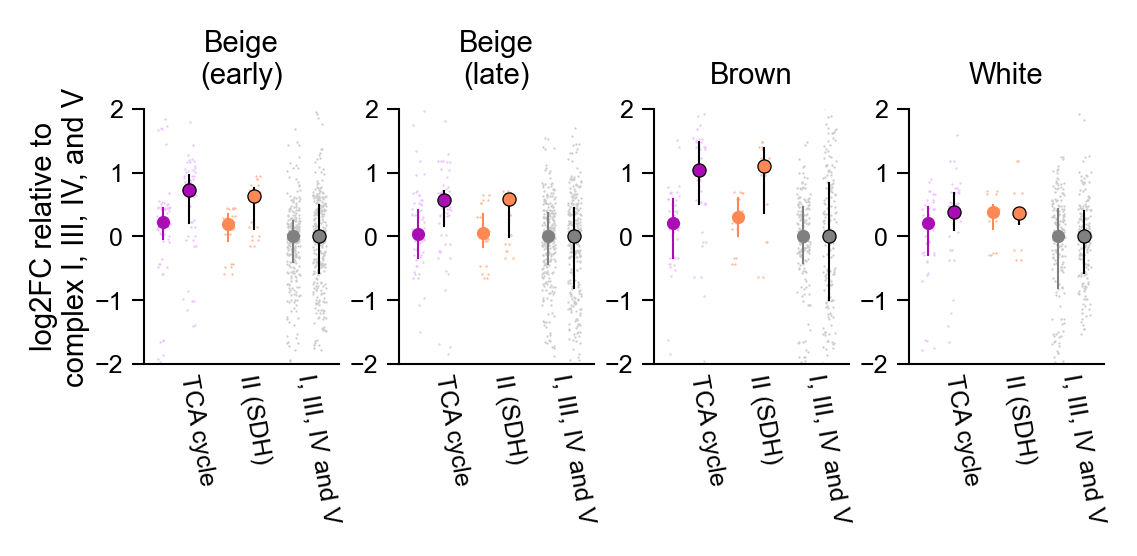

<Figure size 640x480 with 0 Axes>

In [ ]:
sF = 1 # Size factor
wgap = 0.2
hgap = 0.1
nrow, ncol = 1, len(plot_data_dict)

width_ratios = [0.65] * len(plot_data_dict)
height_ratios = [0.85]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
for celltype in plot_data_dict:
    plot_data = plot_data_dict[celltype]['plot_data']
    point_color_list = plot_data_dict[celltype]['point_color_list']
    sct_color_list = plot_data_dict[celltype]['sct_color_list']


    ax = fig.add_subplot(grid[row,col])

    for i, data in enumerate(plot_data):
        ax.scatter(x_pos[i], np.median(data),
                    s=10,
                    c=point_color_list[i],
                    lw=0.3 if i%2 else 0, 
                    edgecolors='k',
                    zorder=3)
        ax.plot([x_pos[i], x_pos[i]], 
                [np.quantile(data, 0.25), np.quantile(data, 0.75)],
                color='k' if i%2 else point_color_list[i], 
                lw=0.5)

    for x, values, c in zip(x_pos, plot_data, sct_color_list):
        rasterized = False
        if x > 4: rasterized = True
        strip_plot(x=x, y=values, 
                    width=0.5, s=0.3, c=c, lw=0, 
                    ax=ax, rasterized=rasterized)

    ax.set_xlim(x_pos[0]-0.5-group_gap/2, x_pos[-1]+0.5+group_gap/2)
    ax.set_ylim(-2, 2)
    ax.set_xticks([0.5+2.25*i for i in range(len(Genesets))])
    ax.set_xticklabels(['TCA cycle', 'II (SDH)', 'I, III, IV and V'], rotation=-80, ha='left')
    ax.tick_params(width=0.5, length=3, pad=2)
    ax.tick_params(axis='x', length=0, pad=2)

    ax.set_title(celltype)
    ax.set_xlabel('')
    ax.set_ylabel('')
    if col==0: 
        ax.set_ylabel('log2FC relative to\ncomplex I, III, IV, and V', labelpad=1)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)    

    col+=1


plt.savefig('comp_OXPHOS_R-P-relFC_strip-point.pdf', bbox_inches='tight')
plt.show()
plt.clf()

In [10]:
from scipy.stats import mannwhitneyu, ks_2samp

for celltype in plot_data_dict:
    print(celltype)
    print(f"{len(plot_data_dict[celltype]['plot_data'][0])}, {len(plot_data_dict[celltype]['plot_data'][2])}, {len(plot_data_dict[celltype]['plot_data'][4])}")
    print(mannwhitneyu(plot_data_dict[celltype]['plot_data'][0], plot_data_dict[celltype]['plot_data'][1])[1])
    print(mannwhitneyu(plot_data_dict[celltype]['plot_data'][2], plot_data_dict[celltype]['plot_data'][3])[1])
    print(mannwhitneyu(plot_data_dict[celltype]['plot_data'][4], plot_data_dict[celltype]['plot_data'][5])[1], '\n')

Beige
(early)
72, 24, 285
6.5115023473338694e-06
0.006662640151115198
0.4995190267255505 

Beige
(late)
72, 24, 285
5.400591065645357e-05
0.010828431046918982
0.39406949510304845 

Brown
48, 16, 192
5.6287655714422584e-05
0.024717719477977716
0.9662446368456504 

White
48, 16, 192
0.06015355572627643
1.0
0.8728552432495815 

